# <style type="text/css">
  body     {background      : white;
            font-family     : "arial";
            font-size       : 10pt;
            font-weight     : normal;
	    color           : black;}
  h1       {text-align      : left;
            color           : black;
            font-size       : 16pt; 
	    font-weight	    : bold;
            background      : rgb(186,240,10);
            padding         : 5px;
          -moz-border-radius: 10px 10px 10px 10px;}
  h2       {text-align      : left;
            color           : black;
            font-size       : 12pt; 
	    font-weight	    : bold;
            background      : rgb(186,240,10);
            padding         : 5px;
          -moz-border-radius: 10px 10px 10px 10px;}
  h3	   {text-align      : left;
            color           : black;
            font-size       : 10pt; 
            font-weight     : normal;
            background      : rgb(196,202,193);
            padding         : 5px;
          -moz-border-radius: 10px 10px 10px 10px;}
  h4	   {text-align      : left;
            color           : white;
            font-size       : 24pt; 
            font-weight     : bold;
            background      : black;
            padding         : 5px;}
  h5	   {text-align      : left;
            color           : black;
            font-size       : 10pt; 
            font-weight     : normal;
            border          : 1px rgb(0,173,208) solid;
            padding         : 5px;
          -moz-border-radius: 10px 10px 10px 10px;}
  p        {text-align      : center;}
  
  a        {text-decoration : none;
            color           : rgb(3,31,115);}
  a:hover  {background      : rgb(135,136,0); 
            color           : white;}
  a:active {background      : white; 
            color           : rgb(135,136,0);}
  ul       {list-style-type : square;
            list-style-image: url(Images/Arrow.gif);
            font-size       : 10pt;}
  table    {text-align      : left;
            font-family     : "times new roman";
            font-weight     : normal;
            font-size       : 10pt;
            color           : black;
            background-color: rgb(245,255,240);
            border          : 1px rgb(186,240,10) solid;
            border-collapse : seperate;
            border-spacing  : 5px;
            padding         : 0px;
          -moz-border-radius: 10px 10px 10px 10px;}
  table.header {valign      : center;
            font-family     : "times new roman";
            font-weight     : normal;
            font-size       : 10pt;
            color           : white;
            background-color: black;
            border          : 1px rgb(186,240,10) solid;
            border-collapse : seperate;
            border-spacing  : 5px;
            padding         : 0px;
          -moz-border-radius: 10px 10px 10px 10px;}
</style>

# Worksheet 2: Introduction to using Python and the Python Library IRIS for analysis and visualisation

In this worksheet sample PRECIS output over Southeast Asia driven by HadCM3Q0 and ECHAM5 is compared with observations for validation purposes. Validation of model results by comparison with observed data is and essential step. It is the measure by which we can assess the quality of the model and it informs appropriate uses of the data.


Here, we use PRECIS output driven by two different GCMs. Using data from both experiments will give us two representations of present day climate and two possible climate scenarios. For more details on multimodel approaches see the PRECIS workshop lecture on climate model ensembles.


The following are examples of types of analyses undertaken as part of a model validation. The methods shown are not necessarily the only way to proceed and are intended to demonstrate the use of Iris in model validation, and provide a starting point for your own analyses. For further help on validating your PRECIS simulations, refer to the PRECIS workshop lecture notes.

__Note:__ <span style="color:red">The data used here has been processed in the same way as Worksheet 1. The 8 point-rim has been removed and it has been converted from PP to netCDF format.</span>


# 2.1 Inspecting the data

The datasets used here are daily and monthly data from two PRECIS runs carried out over Southeast Asia, one driven by HadCM3Q0 and the other driven by ECHAM5. The observations used for comparison are from the APHRODITE gridded observational data set (insert URL).

in Iris, data are read into an object called a cube. A cube contains the data of interest (e.g., temperature, rainfall, wind speeds) and metadata about a phenomenon. A single cube describes only one type of data. It is not possible for a cube to contain both temperature and rainfall, for example. A cube always has a name, a unit and an n-dimensional data array to represents the cube’s data. Additionally, the cube contains collections of coordinates.  Coordinate types can include spatial information (latitude, longitude, altitude), times, or other information, e.g., an ensemble number.

__1 a.) Load the data netCDF file for the HadCM3Q0 and ECHAM5 model data and the APHRODITE rainfall observation data and print the cube output.__

A cube has coordinates (for example time, longitude, latitude, model levels etc) and this information can be accessed with commands. At the prompted print statement for APHRODITE, by following the example of 4.3 http://scitools.org.uk/iris/docs/latest/userguide/navigating_a_cube.html#accessing-coordinates-on-the-cube, find the latitude and longitude of the corners of the locations. You can do so by printing the latitude and longitude coordinates (.points) and note the first and last values in the array.

In [ ]:
# This command ensures we are in the correct directory. Edit it as necessary to the directory you are working from.
%cd /media/sf_share/UK

Before running the code take a look at it line by line to understand what steps are being made. Add code where prompted and then click in the box and press 'ctrl' + 'enter' to run the code. The output will be printed below. If you have an error try again or ask for help.

In [ ]:
# Ensure you have iris 1.10 or greater
import iris

# Feed in the names of the directories where the netCDF model files are stored
path_in_cahpa   = 'monthly/cahpa/05216/'
path_in_cahpb   = 'monthly/cahpb/05216/'
path_in_APHRO   = 'monthly/APHRODITE/'

# Load and print the HadCM3Q0 (cahpa) model cube data
cahpaData = iris.load_cube(path_in_cahpa + 'cahpaa.pm.6190.05216.rr8.nc')
print 'This is the HadCM3Q0 cube'
print cahpaData
print

# Load and print the ECHAM5 (cahpb) model cube data
cahpbData = iris.load_cube(path_in_cahpb + 'cahpba.pm.6190.05216.rr8.nc')
print 'This is the ECHAM5 cube'
print cahpbData
print


# Load and print the APHRODITE observation cube data
aphroData = iris.load_cube(path_in_APHRO + 'aphro.mon.6190.nc')
print 'This is the APHRODITE cube'
print aphroData
print

# The coord objects of the data cubes contain the co-ordinate points of the data
print 'This is the APHRODITE cube latitude coordinate data'
print  aphroData.coord('latitude').points

print 'This is the APHRODITE cube longitude coordinate data'
print  aphroData.coord('longitude').points


__1 b.) The ability to extract a subset of the data within a cube is an important function in iris. The extraction of a subset of data is called slicing.  For example, it could be necessary to extract data over all latitude and longitude grid points on the first time step. For more information around subsetting cubes please read further here: http://scitools.org.uk/iris/docs/latest/userguide/subsetting_a_cube.html#cube-indexing
__

__Using the HacCM3Q0 data, the example below shows how to subset a cube for the first time and last timesteps. Note: this method will be used later for plotting data from a cube.__ 

Work through the example below line by line then click in the box and press 'ctrl' + 'enter' to run the code. 

In [ ]:
import iris

# Feed in the name of the directory where the netCDF model files are stored
path_in_cahpa   = 'monthly/cahpa/05216/'

# Load the netCDF file into a cube
cahpaData = iris.load_cube(path_in_cahpa + 'cahpaa.pm.6190.05216.rr8.nc')

print 'This is the cube with all timesteps'
print cahpaData
print

print 'This is the first time step of the cube' 
print cahpaData[0]
print

print 'This is the last time step of the cube'
print cahpaData[-1]


## 2.2 Converting units

__8 a. ) Convert the OND (October, November, December) seasonal precipitation fields for both runs from kg/m2/s (equivalent to mm/s) to mm/day.  We could just multiply the raw data in mm/s by 86400 seconds, but a clearer way is to use the convert_units method with the name of the units we want to convert the data into.__

__First example is for cahpa__

In [ ]:
import iris
import os
import numpy as np
import glob

# directory of where the data is loaded and saved from/to
data_path = 'monthly/cahpa/05216/'

# load the historical and future period netCDF filenames into a list
flist = glob.glob(data_path + '*.rr8.nc')

for fn in flist:
    # Load the netCDF file 
    cahpa_cube = iris.load_cube(fn)
    print 'Working with ' + fn
    print 'The current units are:' 
    print cahpa_cube.units
    print
    print 'This is an example rainfall rate (kg m-2 s-1) prior to conversion:'
    print np.amax(cahpa_cube.data)
    print

    # convert units to kg m-2 day-1 (same as multiplying by 86400 seconds)
    cahpa_cube.convert_units('kg m-2 day-1')

    print 'This is the same rainfall rate but in (kg m-2 day-1)'
    print 'I.e. converted to rainfall per day rather than per second.'
    print 'This is equivalent to multiplying by 86400 seconds:'
    print np.amax(cahpa_cube.data)
    print

    # Rename the units to mm day-1. 1 kg m-2 is equivalent to 1 mm of rain
    cahpa_cube.units = 'mm day-1'

    # Print cube.units to view new units for precipitation
    print 'The new rainfall units are:'
    print cahpa_cube.units
    print

    # Save output
    outfile = fn.replace('.nc', '.mmday.nc')
    iris.save(cahpa_cube, outfile)
    print 'The cube has been saved: ' + outfile
    print '----------------------------------------------------'
    print

__8. b) Below we follow the same proceedure for cahpb.__

In [ ]:
import iris
import os
import numpy as np
import glob

# directory of where the data is loaded and saved from/to
data_path = 'monthly/cahpb/05216/'

# load the historical and future period netCDF filenames into a list
flist = glob.glob(data_path + '*.rr8.nc')

for fn in flist:
    # Load the netCDF file 
    cahpb_cube = iris.load_cube(fn)
    print 'Working with ' + fn
    print 'The current units are:' 
    print cahpb_cube.units
    print
    print 'This is an example rainfall rate (kg m-2 s-1) prior to conversion:'
    print np.amax(cahpb_cube.data)
    print

    # convert units to kg m-2 day-1 (same as multiplying by 86400 seconds)
    cahpb_cube.convert_units('kg m-2 day-1')

    print 'This is the same rainfall rate but in (kg m-2 day-1)'
    print 'I.e. converted to rainfall per day rather than per second.'
    print 'This is equivalent to multiplying by 86400 seconds:'
    print np.amax(cahpb_cube.data)
    print

    # Rename the units to mm day-1
    cahpb_cube.units = 'mm day-1'

    # Print cube.units to view new units for precipitation
    print 'The new rainfall units are:'
    print cahpb_cube.units
    print

    # Save output
    outfile = fn.replace('.nc', '.mmday.nc')
    iris.save(cahpb_cube, outfile)
    print 'The cube has been saved: ' + outfile
    print '----------------------------------------------------'
    print

## 2.3 Climatological mean calculation

__1 a. ) Calculate the 1961-1990 seasonal mean precipitation field for October-December (OND) from both the HadCM3Q0 (cahpa) and ECHAM5 (cahpb) driven PRECIS runs.__

Work through the example below line by line then click in the box and press 'ctrl' + 'enter' to run the code.


In [ ]:
import iris
import iris.coord_categorisation
import os

try:
    os.mkdir('monthly/climatology')
except OSError:
    pass

path_out = "monthly/climatology/"

for jobid in ['cahpa', 'cahpb']:

    path_in = "monthly/" + jobid + "/05216/"

# Load the data
    data = iris.load_cube(path_in + jobid + 'a.pm.6190.05216.rr8.mmday.nc')

# In order to calculate OND mean, we use the command below to add season membership coordinate
# The seasons can be any sequence of months, identified by the first letters of the names of the months.
# Here, we define two seasons, jfmamjjas (the months we are not interested in) and ond (October, November and
# December), the months we do want.
    iris.coord_categorisation.add_season(data, 'time', name='seasons', seasons=('jfmamjjas','ond'))

# This command extracts data for the OND season using a constraint
    data_ond = data.extract(iris.Constraint(seasons='ond'))
    print 'This is the seasonal OND constrained cube'
    print data_ond
    print 

# The cube data_ond contains data for October-December for all years. The command below
# calculates the mean over all years.
    seasonal_mean = data_ond.aggregated_by(['seasons'], iris.analysis.MEAN)
    print 'This is the seasonal OND mean cube for the baseline period 1961-1990'
    print seasonal_mean
    print

# Save the OND seasonal mean as a netCDF
    iris.save(seasonal_mean, path_out + jobid + 'a.OND.mean.baseline.05216.mmday.nc')
    print 'The cube has been saved to the monthly/climatology/ directory'

__1 b.) Calculate the 1961-1990 seasonal mean for OND from the APHRODITE observation data.__

__Note:__ APHRODITE is a daily high resolution (0.25 degree) rain gauge-based precipitation data set over Asia for 1950-2007. See http://www.chikyu.ac.jp/precip/ for more information.

__HINT__ Follow step 1. a), the file name to load is: 'aphro.mon.6190.nc'


In [ ]:
import iris
import iris.coord_categorisation

# Directory names where data is read from and stored to
path_in_aphro   = 'monthly/APHRODITE/'
path_out        = 'monthly/climatology/'

# Load the aprhodite data
aphroData = iris.load_cube(path_in_aphro + 'aphro.mon.6190.nc')

print 'This is the aphrodite data'
print aphroData
print

# in order to calculate OND mean, need to a add season membership coordinate
iris.coord_categorisation.add_season(aphroData, 'time', name='seasons', seasons=('jfmamjjas','ond'))

# Then constrain the cube just for the OND season
aphroData = aphroData.extract(iris.Constraint(seasons='ond'))
print 'This is the seasonal OND constrained cube'
print aphroData
print 

# Now calculate the mean over this season
aphro_seasonal_mean = aphroData.aggregated_by(['seasons'], iris.analysis.MEAN)
print 'This is the seasonal OND mean cube for the baseline period 1961-1990'
print aphro_seasonal_mean
print

# save the seasonal mean as a netCDF
iris.save(aphro_seasonal_mean, path_out + 'aphro.OND.mean.baseline.05216.mmday.nc')
print 'The cube has been saved to the monthly/climatology/ directory'


## 2.4 IRIS quick plotting and visualising data

__Now we will plot the output to take a first look at what the precipitation 1961-1990 OND seasonal mean looks like for each dataset. This provides an initial introduction to visualising data quickly through iris, for further reading and instructions how please visit: http://scitools.org.uk/iris/docs/latest/userguide/plotting_a_cube.html __ 

Work through the example below line by line to try to understand what each step is doing, then press 'ctrl' + 'enter' to run the code and view the output below.

What are the differences between the plots? Note the colour bars, where are the largest daily rainfall rates distributed? Why do you think this is happening?

In [ ]:
%matplotlib inline 
# do not delete - needed ipython function

# import the iris, matplotlib and iris quickplot libraries
import iris
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import matplotlib.cm as cm

# Directory name where data is read from
path_in = 'monthly/climatology/'

# load cahpa model data
cahpa_cube = iris.load_cube(path_in + 'cahpaa.OND.mean.baseline.05216.mmday.nc')
print cahpa_cube

# load cahpb model data
cahpb_cube = iris.load_cube(path_in + 'cahpba.OND.mean.baseline.05216.mmday.nc')
print cahpb_cube

# load APHRODITE data
obs_cube   = iris.load_cube(path_in + 'aphro.OND.mean.baseline.05216.mmday.nc')
#print obs_cube

# Define the contour levels for all plots
levels = range(0, 22, 2)

# Create a figure of the size 12x10 inches
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)           # Create a new subplot for the model data 2 row, 2 columns, 1st plot
qplt.contourf(cahpa_cube[0], levels=levels, cmap=cm.RdBu)   # Note this is where cube slicing is needed as you can only plot 2-coordinate
                               # dimensions with qplt.contourf, so here we have selected time[0] as there is only
                               # one timestep (the baseline 1961-1990 mean)

plt.title('Q0 model')          # plots a title for the plot
ax = plt.gca()                 # gca function that returns the current axes
ax.coastlines()                # adds coastlines defined by the axes of the plot
ax.gridlines()                 # adds x and y grid lines to the plot

plt.subplot(2, 2, 2)           # Create a new subplot for the model data 2 row, 2 columns, 2nd plot
qplt.contourf(cahpb_cube[0], levels=levels, cmap=cm.RdBu)

plt.title('ECHAM5 model')       # plots a title for the plot
ax = plt.gca()                 # gca function that returns the current axes
ax.coastlines()                # adds coastlines defined by the axes of the plot
ax.gridlines()                 # adds x and y grid lines to the plot

plt.subplot(2, 1, 2)           # Create a new subplot for the observed data 2 row, 1 columns, second plot
                               # This plot will be centred and below the two model plots
qplt.contourf(obs_cube[0], levels=levels, cmap=cm.RdBu)

plt.title('APHRODITE obs')     # plots a title for the plot
ax = plt.gca()                 # gca function that returns the current axes
ax.coastlines()                # adds coastlines defined by the axes of the plot
ax.gridlines()                 # adds x and y grid lines to the plot

plt.tight_layout()             # automatically adjusts subplot(s) to fit in to the figure area
plt.show()

## 2.5 Mean annual cycle calculation

If you have an area or region you want to focus on you can extract data for the region of interest. This example works through how to constrain your cube.

__1 a. ) Extract the area around Kuala Lumpur from the monthly precipitation data for both the HadCM3Q0 (cahpa) and ECHAM5 (cahpb) driven runs by specifiying latitude and longitude coordinates.__

Work through the example below and remove the double ## comments and review the code line by line to understand what is being done.


In [ ]:
import iris

# Set up an area constraint for Kuala Lumpur (KL).
# PRECIS uses a rotated grid, so the co-ordinates required are different to
# real world coordinates.
# All grid cells whose longitudes and latitudes lie within the limits shown will be selected.

KL_constraint = iris.Constraint(grid_longitude = lambda cell: -8.17 <= cell <= -7.43, \
                                grid_latitude = lambda cell: -12.10 <= cell <= -11.38)

for jobid in ['cahpa', 'cahpb']:

# Directory name where data are read from and stored to
    path  = 'monthly/' + jobid + '/05216/'
    
# Load the baseline precipitation data using the KL_constraint - the command below
# loads the data into a cube constrained by the area chosen
    model_KL = iris.load_cube(path + jobid + 'a.pm.6190.05216.rr8.mmday.nc', KL_constraint)

    print 'The data from ' + jobid + ' around Kuala Lumpur. There are only 4 lat points and 5 long points.'
    print model_KL

# save the constrained cube
    iris.save(model_KL, path + jobid + 'a.pm.6190.05216.rr8.ext.mmday.nc')


__Now do the same for APHRODITE__

In [ ]:
import iris

# Directory where data are read from and stored to
path  = 'monthly/APHRODITE/'

# Set up area constraint for Kuala Lumpur
# Note that the Aphrodite data are on a regular grid (unlike the  model data) so real latitudes and longitudes are
# used to define the region around KL (more on this in section 2.6)
KL_constraint2 = iris.Constraint(longitude = lambda cell: 101.25 <= cell <= 102.15, \
                                latitude = lambda cell: 2.74 <= cell <= 3.48)

# Load the Aphrodite data using the KL_constraint
aphrod = iris.load_cube(path + 'aphro.mon.6190.nc', KL_constraint2)
print aphrod

# save the constrained cube to directory
iris.save(aphrod, path + 'aphro.pm.6190.05216.rr8.ext.mmday.nc')


__1 b. ) We now calculate monthly mean fields for 1961-1990 for each of the twelve months for the KL area.__

In [ ]:
import iris
import iris.coord_categorisation

path_out = 'monthly/climatology/'

for jobid in ['cahpa', 'cahpb']:

# Set up the path to the data
    path_in = 'monthly/' + jobid + '/05216/'
    
# Load the data extracted around Kuala Lumpur created in previous step
    data = iris.load_cube(path_in + jobid + 'a.pm.6190.05216.rr8.ext.mmday.nc')

# Add monthly coord categorisation to the time dimension coordinate
    iris.coord_categorisation.add_month_number(data, 'time', name='month_number')
    print data

# Calculate monthly mean values
    monthly_mean = data.aggregated_by(['month_number'], iris.analysis.MEAN)

    print 'This is the monthly mean cube'
    print monthly_mean

# Calculate area averaged monthly mean rainfall 
    monthly_mean = monthly_mean.collapsed(['grid_longitude', 'grid_latitude'], iris.analysis.MEAN)
    print 'This is the monthly mean averaged over the area'
    print monthly_mean

# Save the area averaged monthly mean data
    iris.save(monthly_mean, path_out + jobid + 'a.monmean.baseline.05216.rr8.ext.mmday.nc')
    print 'The cube has been saved to ' + path_out + jobid + 'a.monmean.baseline.05216.rr8.ext.mmday.nc'
    print
 

__1 c. ) What is the KL area averaged monthly mean precipitation amount in mm/day for the HadCM3Q0 and ECHAM5 driven PRECIS runs?__ 

__By plotting the data of the cubes note down the approximate values in mm day-1.__

In [ ]:
#do not delete - needed ipython function
%matplotlib inline

import iris
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import matplotlib.dates as mdates

# Directory to read in data from
datapath = 'monthly/climatology/'

# Model names to loop over
model_name = ['cahpa', 'cahpb']

# Set up date format for plotting - here, months are shown using abbreviated month names (Jan, Feb, Mar, ... Dec).
# The alternative (%m) uses two digit numbers.
#axFmt = mdates.DateFormatter('%m')
axFmt = mdates.DateFormatter('%b')

for model in model_name:
    # Load the model cube
    cube = iris.load_cube(datapath + model + 'a.monmean.baseline.05216.rr8.ext.mmday.nc')
    
    # Quick line plot for each cube 
    qplt.plot(cube.coord('month_number'), cube, label=model)
    plt.title('KL area averaged ' + model + ' monthly\n average of daily rainfall')
    ax = plt.gca()
    ax.xaxis.set_label_text('Month Number')
    ax.set_xlim(0.5, 12.5)
    plt.show()


__1 d. ) Now by following the same methodology as above for 1 b) for the KL area find the monthly means 1961-1990 for APHRODITE observations.__

In [ ]:
# Type code here
import iris
import iris.coord_categorisation

# Dirctories to load and save to
path_in        = 'monthly/APHRODITE/' 
path_out       = 'monthly/climatology/'

# Load the KL extracted data created in previous step
aphrod = iris.load_cube(path_in + 'aphro.pm.6190.05216.rr8.ext.mmday.nc')

# Add monthly coord categorisation to the time dim coordinate
iris.coord_categorisation.add_month_number(aphrod, 'time', name='month_number')

# Now calculate monthly means
aphro_monthly_mean = aphrod.aggregated_by(['month_number'], iris.analysis.MEAN)

print 'This is the monthly mean cube'
print aphro_monthly_mean
# create the area averaged monthly mean of daily rainfall 
aphro_monthly_mean = aphro_monthly_mean.collapsed(['longitude', 'latitude'], iris.analysis.MEAN)
print 'This is the monthly mean averaged over the area'
print aphro_monthly_mean

# Save output
iris.save(aphro_monthly_mean, path_out + 'aphro.monmean.baseline.05216.rr8.ext.mmday.nc')
print 'The cube has been saved to ' + path_out + 'aphro.monmean.baseline.05216.rr8.ext.mmday.nc'
print


__1 e. ) Plot the observations and the HadCM3Q0 and ECHAM5 driven PRECIS runs. What are the differences between the observations and models, what months are the differences greatest?__


In [ ]:
# do not delete - needed ipython function
%matplotlib inline

import iris
import matplotlib.pyplot as plt
import iris.quickplot as qplt

# Directory to read data from
path = 'monthly/climatology/'

# Model job ids and name of observed data to loop over.
names = ['cahpaa', 'cahpba', 'aphro']

for id in names:
    # Load the cube
    cube = iris.load_cube(path + id + '.monmean.baseline.05216.rr8.ext.mmday.nc')
    
    # quick line plot for each cube and holding onto the same plot 
    qplt.plot(cube.coord('month_number'), cube, label=id)
    plt.title('KL area averaged ' + id + '\n monthly average of daily rainfall')
    ax = plt.gca()
    ax.xaxis.set_label_text('Month Number')
    ax.set_xlim(0.5, 12.5)

    plt.show()

## 2.6 Comparing models and observations

To compare spatial model and observation fields properly they must be on the same grid. We will regrid to the coarsest grid. For the data used here, the observations have the coarsest resolution so we will regrid the model data onto the observation grid.

The PRECIS model data are on a grid known as a Rotated Grid. The idea is that the "real" north pole in the Arctic is shifted such that the equator then runs through the centre of the regional model domain.

First, we will compare the observations and model data before regridding.

__1 a. ) Create figures to compare the modelled and observed seasonal mean rainfall totals.__


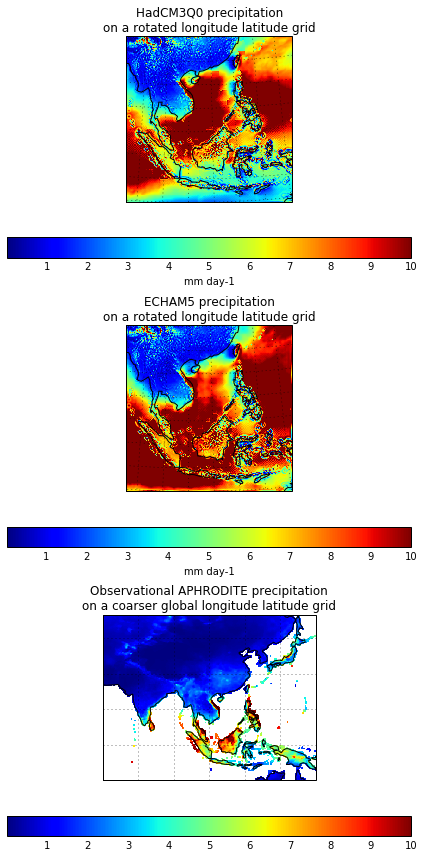

In [4]:
%matplotlib inline 
# do not delete - needed ipython function

# import the iris, matplotlib and iris quickplot libraries
import iris
import matplotlib.pyplot as plt
import iris.quickplot as qplt

# Directory to read in data from
datapath = 'monthly/climatology/'

# load cahpaa model data
model_cube_a = iris.load_cube(datapath + 'cahpaa.OND.mean.baseline.05216.mmday.nc')

# load cahpaa model data
model_cube_b = iris.load_cube(datapath + 'cahpba.OND.mean.baseline.05216.mmday.nc')

# load APHRODITE into a cube 
obs_cube = iris.load_cube(datapath + 'aphro.OND.mean.baseline.05216.mmday.nc')

# Create a figure of the size 6x12 inches
plt.figure(figsize=(6, 12))
plt.subplot(3, 1, 1)        # Create a new subplot for the model data 3 rows, 1 column, 1st plot
qplt.pcolormesh(model_cube_a[0], vmax=10) # quickly plots a colormesh map plot of the model data
plt.title('HadCM3Q0 precipitation\n'
          'on a rotated longitude latitude grid')  # plots a title for the plot
ax = plt.gca()              # gca function that returns the current axes
ax.coastlines()             # adds coastlines defined by the axes of the plot
ax.gridlines()              # adds x and y grid lines to the plot

plt.subplot(3, 1, 2)        # Create a new subplot for the model data, 2nd plot
qplt.pcolormesh(model_cube_b[0], vmax=10)
plt.title('ECHAM5 precipitation\n'
          'on a rotated longitude latitude grid')
ax = plt.gca()
ax.coastlines()
ax.gridlines()

plt.subplot(3, 1, 3)        # Create a new subplot for the obs data, 3rd plot       
qplt.pcolormesh(obs_cube[0], vmax=10)   # quickly plots a colormesh map plot of the obs data
plt.title('Observational APHRODITE precipitation\n'
          'on a coarser global longitude latitude grid') # plots a title for the plot
ax = plt.gca()              # gca function that returns the current axes
ax.coastlines()             # adds coastlines defined by the axes of the plot
ax.gridlines()              # adds x and y grid lines to the plot

plt.tight_layout()          # automatically adjusts subplot(s) to fit in to the figure area

plt.show()


__1 b. ) Regrid the multiannual OND mean model fields onto the observations grid.__

Note: regrid is used to regrid the target cube. Here we will use linear interpolation. First, load in the data.


In [ ]:
#%cd /media/sf_share/UK
import iris
iris.FUTURE.netcdf_promote = True

# directory where data is stored
data_path = 'monthly/climatology/'

# load cahpaa
cahpa_model_cube = iris.load_cube(data_path + 'cahpaa.OND.mean.baseline.05216.mmday.nc')
# load cahpba
cahpb_model_cube = iris.load_cube(data_path + 'cahpba.OND.mean.baseline.05216.mmday.nc')
# load APHRODITE into a cube
obs_cube = iris.load_cube(data_path + 'aphro.OND.mean.baseline.05216.mmday.nc')
print cahpa_model_cube
print cahpb_model_cube
print obs_cube

Before we can regrid the model data to the grid used by the observations, the coordinate system used for the observations must be supplied - it is missing from the original NetCDF file.  The observations are on a regular longitude-latitude grid so the correct coordinate system is WGS84.

We define the WGS84 coordinate system and then apply it to the x- and y-axes (i.e. longitudes and latitudes) of the observations.  The coordinate system used by the model (the rotated grid) is already defined.

In [ ]:
# Define WGS84 projection for obs data
wgs84 = iris.coord_systems.GeogCS(semi_major_axis=6378137.0, inverse_flattening=298.257223563)

# Apply WGS84 to obs cube
obs_cube.coord(axis='x').coord_system = wgs84
obs_cube.coord(axis='y').coord_system = wgs84

# Print out the two coordinate systems
print obs_cube.coord_system()
print cahpa_model_cube.coord_system()

The next few lines regrid the model data to the regular grid used by the observations.  From the figures above, the area over which APHRODITE data are available is larger than the PRECIS model domain. Hence, the extrapolation mode is set to 'mask' so that any grid cells on the APHRODITE grid which do not overlap with model grid cells are masked off; otherwise, the model data would be interpolated which would produce misleading results.

In [ ]:
# Regrid the climate model data onto APHRODITE grid
cahpa_regrid = cahpa_model_cube.regrid(obs_cube, iris.analysis.Nearest(extrapolation_mode='mask'))
cahpb_regrid = cahpb_model_cube.regrid(obs_cube, iris.analysis.Nearest(extrapolation_mode='mask'))

# Save output
iris.save(cahpa_regrid, data_path + 'cahpaa.OND.mean.baseline.05216.mmday.rg.nc')
iris.save(cahpb_regrid, data_path + 'cahpba.OND.mean.baseline.05216.mmday.rg.nc')


__1 c. ) Now that the model grids have been regridded to the observation cube: (i) load the netCDF files, and (ii) then plot the APHRODITE and model data again (as above in 15.) to compare them visually once again. What do you note?__

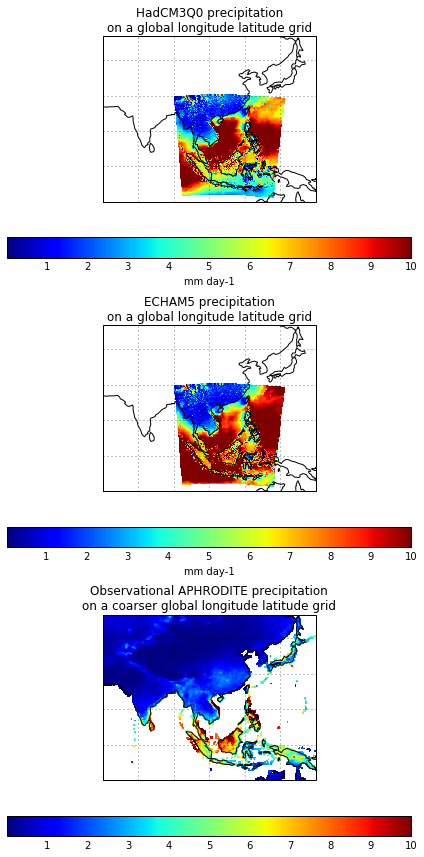

In [6]:
# Insert code here - note you must start with importing the iris, matplotlib and iris quickplot libraries
# Create a figure of the size 6x12 inches

# do not delete - needed ipython function
%matplotlib inline

# import the iris, matplotlib and iris quickplot libraries
import iris
import matplotlib.pyplot as plt
import iris.quickplot as qplt

# directory where data are stored
data_path = 'monthly/climatology/'

cahpa_regrid = iris.load_cube(data_path + 'cahpaa.OND.mean.baseline.05216.mmday.rg.nc')
cahpb_regrid = iris.load_cube(data_path + 'cahpba.OND.mean.baseline.05216.mmday.rg.nc')
obs_cube = iris.load_cube(data_path + 'aphro.OND.mean.baseline.05216.mmday.nc')

plt.figure(figsize=(6, 12))
plt.subplot(3, 1, 1)        # Create a new subplot for the model data 3 rows, 1 column, 1st plot
qplt.pcolormesh(cahpa_regrid[0], vmax=10) # quickly plots a colormesh map plot of the model data
plt.title('HadCM3Q0 precipitation\n'
          'on a global longitude latitude grid')  # plots a title for the plot
ax = plt.gca()              # gca function that returns the current axes
ax.coastlines()             # adds coastlines defined by the axes of the plot
ax.gridlines()              # adds x and y grid lines to the plot

plt.subplot(3, 1, 2)
qplt.pcolormesh(cahpb_regrid[0], vmax=10)
plt.title('ECHAM5 precipitation\n'
          'on a global longitude latitude grid')
ax = plt.gca()
ax.coastlines()
ax.gridlines()

plt.subplot(3, 1, 3)        # Create a new subplot for the obs data
qplt.pcolormesh(obs_cube[0], vmax=10)
plt.title('Observational APHRODITE precipitation\n'
          'on a coarser global longitude latitude grid')
ax = plt.gca()
ax.coastlines()
ax.gridlines()

plt.tight_layout()          # automatically adjusts subplot(s) to fit in to the figure area

plt.show()

__1 d. ) Find the difference between the model and the observation OND multiannual mean fields and plot maps to view the differences.__

We can simply subtract the model data from the observations.  There is a subtract function within Iris but it cannot be used here.  The model cubes contain extra coordinates which are not present in the obs cube; Iris requires all coordinates within the cubes to match exactly.

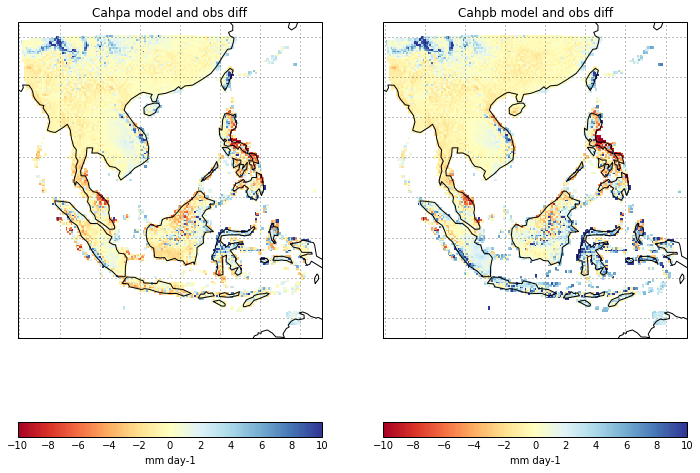

In [7]:
# do not delete - needed ipython function
%matplotlib inline

# import the iris, matplotlib and iris quickplot libraries
import iris
import matplotlib.pyplot as plt
import iris.quickplot as qplt

# load cubes, note this must be the regridded model cubes to compare as they must have the same lat/lon
# and time dimensions

data_path = 'monthly/climatology/'

cahpa_cube = iris.load_cube(data_path + 'cahpaa.OND.mean.baseline.05216.mmday.rg.nc')
cahpb_cube = iris.load_cube(data_path + 'cahpba.OND.mean.baseline.05216.mmday.rg.nc')
obs_cube   = iris.load_cube(data_path + 'aphro.OND.mean.baseline.05216.mmday.nc')

# Make sure units are the same
obs_cube.units = cahpb_cube.units

# Make recieving cube
cahpa_obs_diff = obs_cube.copy()
cahpb_obs_diff = obs_cube.copy()

# Replace data with the differences
cahpa_obs_diff.data = cahpa_cube.data - obs_cube.data

# cahpb - aphrodite differences
cahpb_obs_diff.data = cahpb_cube.data - obs_cube.data

# Save the differences
iris.save(cahpa_obs_diff, data_path + 'diff.cahpa_aphro.OND.baseline.nc')
iris.save(cahpb_obs_diff, data_path + 'diff.cahpb_aphro.OND.baseline.nc')

# Plot the differences as map plots

plt.figure(figsize=(12, 10))

plt.subplot(1, 2, 1)           # Create a new subplot for the first differences, 2 rows, 1 column, 1st plot

# Cut-out region with data. We use the intersection method to plot the region with data

qplt.pcolormesh(cahpa_obs_diff[0].intersection(longitude=(90, 135), latitude=(-20, 32)), 
                vmax=10, vmin=-10, 
                cmap=plt.get_cmap('RdYlBu'))   # Note this is where cube slicing is needed as you can only plot 2-coordinate
                               # dimensions with qplt.contourf, so here we have selected time[0] as there is only
                               # one timestep (the baseline 1961-1990 mean)

plt.title('Cahpa model and obs diff')       # plots a title for the plot
ax = plt.gca()                 # gca function that returns the current axes
ax.coastlines()                # adds coastlines defined by the axes of the plot
ax.gridlines()                 # adds x and y grid lines to the plot

plt.subplot(1, 2, 2)           # Create a new subplot for the model data 2 row, 2 columns, 2nd plot
qplt.pcolormesh(cahpb_obs_diff[0].intersection(longitude=(90, 135), latitude=(-20, 32)),
             vmax=10, vmin=-10,
             cmap=plt.get_cmap('RdYlBu'))

plt.title('Cahpb model and obs diff')       # plots a title for the plot
ax = plt.gca()                 # gca function that returns the current axes
ax.coastlines()                # adds coastlines defined by the axes of the plot
ax.gridlines()                 # adds x and y grid lines to the plot

plt.show()

## 2.7 Climatological mean and annual cycle for an ensemble

So far data from two models downscaled with PRECIS have been analysed. In this section an ensemble of six models will be used, five from the HadCM3 QUMP ensemble (discussed in the model ensemble lecture) and one ECHAM5 model. The five members of the QUMP ensemble are HadCM3Q0 (cahpa), HadCM3Q3 (cahpc), HadCM3Q10 (cahpd), HadCM3Q11 (cahpe) and HadCM3Q13 (cahpf).

Taking an ensemble approach allows us to account for a range of uncertainty in the model projections. Typing the python and IRIS commands into the command line for all six ensemble members would be very time consuming, so we use a script instead.

The script has been written below to generate cubes of ensemble members which can then be saved as one netCDF file. Each ensemble member is identified by its model runid and is listed under a realization dimension coordinate that has been added to the cube. 

Note a more pythonic way would be to write functions, but for the ease of this tutorial it has not this time.

__1 . ) Calculate the OND seasonal mean and annual cycle (for the KL area) for 1.5m temperature and precipitation for CRU and APHRODITE observations.__

Note: The CRU data are a monthly global land-only dataset (1901-present) at 0.5 degree resolution. Nine variables are available, including mean, min, max temperature and precipitation. For further details please see: http://www.cru.uea.ac.uk/~timm/grid/CRU_TS_2_1.html



In [1]:
'''
The purpose of this script is to load the CRU temperature data and APHRODITE rainfall data, and then create (a) the OND
seasonal mean and (b) monthly means averaged over Kuala Lumpur
'''

import iris
import iris.coord_categorisation
iris.FUTURE.netcdf_no_unlimited = True
iris.FUTURE.netcdf_promote = True

# Data directory paths in for loading and out for saving
data_path_in  = 'monthly/'
data_path_out = 'monthly/climatology/'

# Constraint for area of CRU data covered by PRECIS domain
# Values from script 'worksheet2.sh'
model_constraint = iris.Constraint(longitude = lambda cell: 90.0 <= cell <= 137.0, \
                                latitude = lambda cell: -14.0 <= cell <= 31.0)

scodes = ['03236', '05216']

for scode in scodes:
# Load the CRU or APHRODITE data for the PRECIS model domain using the area constraint
    if scode == '03236':
        filename = 'CRU/cru.pm.6190.03236.nc'
    else:
        filename = 'APHRODITE/aphro.mon.6190.nc'
    obs_cube = iris.load_cube(data_path_in + filename, model_constraint)

# In order to calculate OND mean, add a season membership coordinate
    iris.coord_categorisation.add_season(obs_cube, 'time', name='seasons', seasons=('jfmamjjas','ond'))

# Extract data for OND only
    obs_cube_ond = obs_cube.extract(iris.Constraint(seasons='ond'))

# Now calculate the mean over this season
    obs_ond_mean = obs_cube_ond.aggregated_by(['seasons'], iris.analysis.MEAN)

# Add units description to temperature cube
# Save output
    if scode == '03236':
        obs_ond_mean.units = 'celsius'
        file_head = 'cru.OND.mean.baseline.'
    else:
        obs_ond_mean.units = 'mm day-1'
        file_head = 'aphro.OND.mean.baseline.'

    print "Saving file " + file_head + scode + '.nc'
    iris.save(obs_ond_mean, data_path_out + file_head + scode + '.nc')

# Select area around KL from the original data # MIGHT NEED TO REVISE LIMITS?
    obs_cube_KL = obs_cube.intersection(longitude=(101.25,102.15), latitude=(2.74,3.48))
    
# Add monthly categorisation to the time dimension coordinate
    iris.coord_categorisation.add_month_number(obs_cube_KL, 'time', name='month_number')

# Calculate monthly mean values
    obs_monthly_mean = obs_cube_KL.aggregated_by(['month_number'], iris.analysis.MEAN)

# Calculate area averaged monthly means for KL
    obs_monthly_mean = obs_monthly_mean.collapsed(['longitude', 'latitude'], iris.analysis.MEAN)

# Save the observed monthly mean values
    print "Saving monthly mean file ..."
    if scode == '03236':
        iris.save(obs_monthly_mean, data_path_out + 'cru.monmean.baseline.' + scode + '.ext.KL.nc')
    else:
        iris.save(obs_monthly_mean, data_path_out + 'aphro.monmean.baseline.' + scode + '.ext.KL.nc')


/opt/scitools/environments/default/2017_06_07/lib/python2.7/site-packages/iris/cube.py:3281: UserWarning: Collapsing spatial coordinate u'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


__2 . ) Next, we repeat the operations on the six sets of model data - i.e., we create OND mean values and monthly means for the KL region.__

In [8]:
'''
Model runs:
(1) Load each model run id extracted for KL and create OND seasonal mean, regrid to observation grid
(2) Load each model runid for the KL region and then create the OND seasonal mean, regrid to the coaser
observation model grid and merge all cubes into one cube of ensemble members
(3) calculate the difference between models and observations
'''

import iris
import iris.coord_categorisation
iris.FUTURE.netcdf_no_unlimited = True
iris.FUTURE.netcdf_promote = True

# Data directory paths in for loading and out for saving
data_path_in  = 'monthly/'
data_path_out = 'monthly/climatology/'

# These coordinates are for a regular grid as used by the CRU data
KL_constraint = iris.Constraint(longitude = lambda cell: 101.25 <= cell <= 102.15, \
                                latitude = lambda cell: 2.74 <= cell <= 3.48)

# These coordinates are for the rotated grid used by PRECIS
KL_constraint_rotg = iris.Constraint(grid_longitude = lambda cell: -8.17 <= cell <= -7.43, \
                                grid_latitude = lambda cell: -12.10 <= cell <= -11.38)

scodes = ['03236', '05216']

# Define WGS84 projection for obs data. Required to regrid the model data to the obs grid
wgs84 = iris.coord_systems.GeogCS(semi_major_axis=6378137.0, inverse_flattening=298.257223563)

for scode in scodes:
# Load the observed OND mean
    if scode == '03236':
        units = 'degC'
        obs_ond_mean = iris.load_cube(data_path_out + 'cru.OND.mean.baseline.' + scode + '.nc')
    else:
        obs_ond_mean = iris.load_cube(data_path_out + 'aphro.OND.mean.baseline.' + scode + '.nc')
        units = 'mmday'
# Apply WGS84 to obs cube
    obs_ond_mean.coord(axis='x').coord_system = wgs84
    obs_ond_mean.coord(axis='y').coord_system = wgs84

# Loop over each  model runid. We use enumerate, so the variable 'member' runs from 0 to the number of models (6) minus 1
    for member, id in enumerate(range(ord('a'), ord('f')+1)):
        runid = 'cahp' + chr(id)
          
# Load the model data
        subdir = '{}/{}/'.format(runid, scode)
        file_in = '{}a.pm.6190.{}.rr8.nc'.format(runid, scode)
        model_cube = iris.load_cube(data_path_in + subdir + file_in)
          
# In order to calculate OND mean, need to add a season membership coordinate
        iris.coord_categorisation.add_season(model_cube, 'time', name='seasons', seasons=('jfmamjjas','ond'))

# Then extract the part of the cube containing the OND season
        model_cube_ond = model_cube.extract(iris.Constraint(seasons='ond'))

# Calculate the mean for the OND season
        model_ond_mean = model_cube_ond.aggregated_by(['seasons'], iris.analysis.MEAN)

# Change the temperature units from Kelvin to degC, or mm s-1 to mm day-1
        if scode == '03236':
            model_ond_mean.convert_units('celsius')
        else:
            model_ond_mean.convert_units('kg m-2 day-1')
    
# Save the model OND mean
        file_out = '{}a.OND.mean.baseline.{}.{}.nc'.format(runid, scode, units)
        iris.save(model_ond_mean, data_path_out + file_out)
        print "saved " + file_out

# Regrid to observation grid
        model_ond_mean_rg = model_ond_mean.regrid(obs_ond_mean, iris.analysis.Linear())
        file_out = '{}a.OND.mean.baseline.{}.{}.rg.nc'.format(runid, scode, units)
        iris.save(model_ond_mean_rg, data_path_out + file_out)

# Subtract the obs OND mean from the model OND mean and save the difference
        model_ond_diff = obs_ond_mean.copy()
        model_ond_diff.data = model_ond_mean_rg.data - obs_ond_mean.data

        if scode == '03236':
            model_ond_diff.units = 'celsius'
            iris.save(model_ond_diff, data_path_out + 'diff.' + runid + '_cru.OND.baseline.nc')
        else:
            model_ond_diff.units = 'mm day-1'
            iris.save(model_ond_diff, data_path_out + 'diff.' + runid + '_aphro.OND.baseline.nc')

# Remove the seasons coordinate as it is no longer needed
        model_cube.remove_coord('seasons')

# Calculate monthly mean values for each model in the KL domain
# Add monthly coord categorisation to the time dimension coordinate of the KL data
        iris.coord_categorisation.add_month_number(model_cube, 'time', name='month_number')

# Calculate monthly mean values
        model_monthly_mean = model_cube.aggregated_by(['month_number'], iris.analysis.MEAN)

# Change the temperature units from Kelvin to degC, or mm s-1 to mm day-1
        if scode == '03236':
            model_monthly_mean.convert_units('celsius')
        else:
            model_monthly_mean.convert_units('kg m-2 day-1')

# Regrid to observation grid
        model_monthly_mean_rg = model_monthly_mean.regrid(obs_ond_mean, iris.analysis.Linear())

# Extract the region around Kuala Lumpur
        model_mm_KL = model_monthly_mean_rg.extract(KL_constraint)

# Calculate area averaged monthly mean temperatures / rainfall for KL
        model_KL = model_mm_KL.collapsed(['longitude', 'latitude'], iris.analysis.MEAN)
    
# Define and add an ensemble realization coordinate. The cube will now contain a new scalar coordinate named
# 'realization' which will have the value 'member+1' (so the members are numbered 1, 2, ...)
        coord = iris.coords.AuxCoord(member+1, 'realization')
        model_KL.add_aux_coord(coord)    

# Save the model monthly mean values for the KL area
        file_out = '{}a.monthly.mean.baseline.{}.{}.ext.KL.rg.nc'.format(runid, scode, units)
        iris.save(model_KL, data_path_out + file_out)
        print "saved " + file_out


0 97
saved cahpaa.OND.mean.baseline.03236.degC.nc


/opt/scitools/environments/default/2017_06_07/lib/python2.7/site-packages/iris/cube.py:3281: UserWarning: Collapsing spatial coordinate u'latitude' without weighting
  warnings.warn(msg.format(coord.name()))


saved cahpaa.monthly.mean.baseline.03236.degC.ext.KL.rg.nc
1 98
saved cahpba.OND.mean.baseline.03236.degC.nc
saved cahpba.monthly.mean.baseline.03236.degC.ext.KL.rg.nc
2 99
saved cahpca.OND.mean.baseline.03236.degC.nc
saved cahpca.monthly.mean.baseline.03236.degC.ext.KL.rg.nc
3 100
saved cahpda.OND.mean.baseline.03236.degC.nc
saved cahpda.monthly.mean.baseline.03236.degC.ext.KL.rg.nc
4 101
saved cahpea.OND.mean.baseline.03236.degC.nc
saved cahpea.monthly.mean.baseline.03236.degC.ext.KL.rg.nc
5 102
saved cahpfa.OND.mean.baseline.03236.degC.nc
saved cahpfa.monthly.mean.baseline.03236.degC.ext.KL.rg.nc
0 97
saved cahpaa.OND.mean.baseline.05216.mmday.nc
saved cahpaa.monthly.mean.baseline.05216.mmday.ext.KL.rg.nc
1 98
saved cahpba.OND.mean.baseline.05216.mmday.nc
saved cahpba.monthly.mean.baseline.05216.mmday.ext.KL.rg.nc
2 99
saved cahpca.OND.mean.baseline.05216.mmday.nc
saved cahpca.monthly.mean.baseline.05216.mmday.ext.KL.rg.nc
3 100
saved cahpda.OND.mean.baseline.05216.mmday.nc
saved ca

__3. ) Calculate the differences between the models and observations for each ensemble member.__

In [16]:
import iris
iris.FUTURE.netcdf_no_unlimited = True
iris.FUTURE.netcdf_promote = True

# Data directory path in for loading and out for saving
data_path = 'monthly/climatology/'
scodes = ['03236', '05216']

for scode in scodes:
# Load the observed OND mean
    if scode == '03236':
        units = 'degC'
        obs_monthly_mean = iris.load_cube(data_path + 'cru.monmean.baseline.' + scode + '.ext.KL.nc')
    else:
        units = 'mmday'
        obs_monthly_mean = iris.load_cube(data_path + 'aphro.monmean.baseline.' + scode + '.ext.KL.nc')

# Load in the modelled monthly mean values and subtract the observations
    for id in range(ord('a'), ord('f')+1):
        runid = 'cahp' + chr(id)
        filename = '{}a.monthly.mean.baseline.{}.{}.ext.KL.rg.nc'.format(runid, scode, units)
        model_monthly_mean = iris.load_cube(data_path + filename)
        diff = obs_monthly_mean.copy()
        diff.data = model_monthly_mean.data - obs_monthly_mean.data
        file_out = '{}a.monthly.mean.diff.{}.ext.KL.nc'.format(runid, scode)
        iris.save(diff, data_path + file_out)

__4. ) Create four figures: the monthly cycles of temperature and rainfall from the 6 models and the observations, and the monthly differences between the models and observations.__

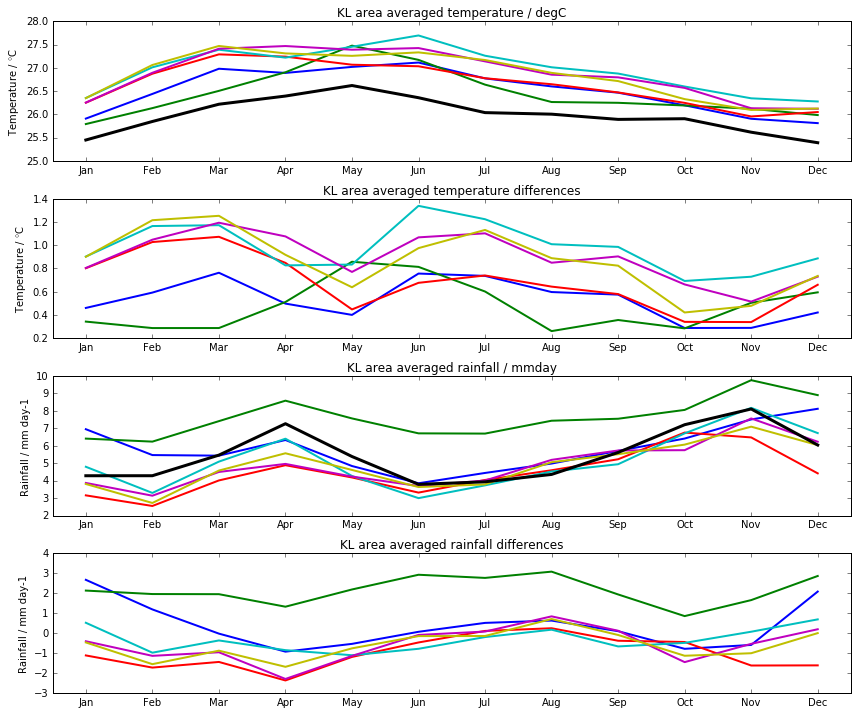

In [20]:
# do not delete - needed ipython function
%matplotlib inline

import iris
import calendar
import iris.quickplot as qplt
import matplotlib.pyplot as plt

# Data directory path in for loading and out for saving
data_path = 'monthly/climatology/'

month_names = calendar.month_abbr
scodes = ['03236', '05216']

plotnum = 0

# Plot the monthly mean cycles
plt.figure(figsize=(12, 10))

for scode in scodes:
    if scode == '03236':
        units = 'degC'
        ylabel = 'Temperature / $\degree$C'
        varname = 'temperature'
    else:
        units = 'mmday'
        ylabel = 'Rainfall / mm day-1'
        varname = 'rainfall'

    plotnum = plotnum + 1
    plt.subplot(4, 1, plotnum)

    for id in range(ord('a'), ord('f')+1):
        runid = 'cahp' + chr(id)
# Load the model cube
        filename = '{}a.monthly.mean.baseline.{}.{}.ext.KL.rg.nc'.format(runid, scode, units)
        model_monthly_mean = iris.load_cube(data_path + filename)

# Use the month numbers from the cube, will be used as x-axis values
        qplt.plot(model_monthly_mean.coord('month_number'), model_monthly_mean, linewidth=2)

# Load and plot the observed monthly cycle
    if scode == '03236':
        obs_monthly_mean = iris.load_cube(data_path + 'cru.monmean.baseline.' + scode + '.ext.KL.nc')
    else:
        obs_monthly_mean = iris.load_cube(data_path + 'aphro.monmean.baseline.' + scode + '.ext.KL.nc')

    qplt.plot(obs_monthly_mean.coord('month_number'), obs_monthly_mean, color='black', linewidth=3)

# Set the axis limits, use month names on the x-axis
    ax = plt.gca()
    ax.set_xlim(0.5, 12.5)
    ax.set_xticks(range(1,13))
    ax.set_xlabel('')
    ax.set_xticklabels(month_names[1:])
    ax.set_ylabel(ylabel)
    ax.set_title('KL area averaged ' + varname + ' / ' + units)

# Now plot the monthly cycles of the differences between the models and observations
    plotnum = plotnum + 1
    plt.subplot(4, 1, plotnum)

    for id in range(ord('a'), ord('f')+1):
        runid = 'cahp' + chr(id)
# Load the differences between the model and observations
        filename = '{}a.monthly.mean.diff.{}.ext.KL.nc'.format(runid, scode)
        model_diff = iris.load_cube(data_path + filename)
        qplt.plot(model_diff.coord('month_number'), model_diff, linewidth=2)

    bx = plt.gca()
    bx.set_xlim(0.5, 12.5)
    bx.set_xticks(range(1,13))
    bx.set_xticklabels(month_names[1:])
    bx.set_xlabel('')
    bx.set_ylabel(ylabel)
    bx.set_title('KL area averaged ' + varname + ' differences')

plt.tight_layout()
plt.show()
